# Shaping Data

### Parsing XML using Beautiful Soup

In [1]:
from bs4 import BeautifulSoup

In [2]:
# Reading the data from the xml file
a = open('XMLData.xml','r')
data = a.read()

In [3]:
#Parsing the stored data inside the beautifulsoup parser. 
#It means we are storing the returned object. 
soup= BeautifulSoup(data,'xml')


In [4]:
# Grab all tags
b = soup.find_all('Record')
print(b)

In [5]:
# Grab the first tag
c = soup.find_all('Record')[0]
print(c)

<Record name="first_record">
<Roll_no>1</Roll_no>
<Name>Ross</Name>
<Branch>ICT</Branch>
</Record>


In [6]:
# Find the tag with name as Name 
c_name=c.find('Name')
print(c_name)

<Name>Ross</Name>


In [7]:
# Find the tag with name as Branch
c_name=c.find('Branch')
print(c_name)

<Branch>ICT</Branch>


In [8]:
#Getting the text inside the tags
value=c_name.get_text()
print(value)

ICT


### Stemming

In [9]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

my_list = ['frightening', 'frightened', 'frightens']
my_list1=['go','going','went']

# Using a Python list comprehension method to apply to all words in my_list
print ([stemming.stem(word) for word in my_list])

print ([stemming.stem(word) for word in my_list1])

['frighten', 'frighten', 'frighten']
['go', 'go', 'went']


### Removing Stop Words

Import stopwords from nltk

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Look at the list of stopwords

In [11]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')    # get english stop words
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Let's remove stopwords from the following piece of text.

In [12]:
sample_text = "the great aim of education is not knowledge but action"

Break text into words

In [13]:
sample_words = sample_text.split()
print(sample_words)

['the', 'great', 'aim', 'of', 'education', 'is', 'not', 'knowledge', 'but', 'action']


Remove stopwords

In [14]:
sample_words = [w for w in sample_words if w not in stopwords.words('english')] 
print(sample_words)

['great', 'aim', 'education', 'knowledge', 'action']


Join words back to sentence

In [15]:
sample_text = " ".join(sample_words)
print(sample_text)

great aim education knowledge action


## Regular Expression

In [16]:
import re

pattern = '^a...s$'
test_string = 'abysh'
result = re.match(pattern,test_string)

if result:
    print("Search successfull")
else:
    print("Search unsuccessfull")
    

Search unsuccessfull


# N-gram

### Simply put, an n-gram is a sequence of n words where n is a discrete number that can range from 1 to infinity! For example, the word “cheese” is a 1-gram (unigram). The combination of the words “cheese flavored” is a 2-gram (bigram). Similarly, “cheese flavored snack” is a 3-gram (trigram). And “ultimate cheese flavored snack” is a 4-gram (qualgram). So on and so forth.

In [17]:
s="""Natural-language processing (NLP) is an area of computer science & artificial intelligence 
concerned with the interactions between computers and human (natural) languages."""

In [18]:
import re

def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]
generate_ngrams(s,n=5)

['natural language processing nlp is',
 'language processing nlp is an',
 'processing nlp is an area',
 'nlp is an area of',
 'is an area of computer',
 'an area of computer science',
 'area of computer science artificial',
 'of computer science artificial intelligence',
 'computer science artificial intelligence \nconcerned',
 'science artificial intelligence \nconcerned with',
 'artificial intelligence \nconcerned with the',
 'intelligence \nconcerned with the interactions',
 '\nconcerned with the interactions between',
 'with the interactions between computers',
 'the interactions between computers and',
 'interactions between computers and human',
 'between computers and human natural',
 'computers and human natural languages']

In [19]:
import re
from nltk.util import ngrams

s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
output = list(ngrams(tokens, 5))
print(output)

[('natural', 'language', 'processing', 'nlp', 'is'), ('language', 'processing', 'nlp', 'is', 'an'), ('processing', 'nlp', 'is', 'an', 'area'), ('nlp', 'is', 'an', 'area', 'of'), ('is', 'an', 'area', 'of', 'computer'), ('an', 'area', 'of', 'computer', 'science'), ('area', 'of', 'computer', 'science', 'artificial'), ('of', 'computer', 'science', 'artificial', 'intelligence'), ('computer', 'science', 'artificial', 'intelligence', '\nconcerned'), ('science', 'artificial', 'intelligence', '\nconcerned', 'with'), ('artificial', 'intelligence', '\nconcerned', 'with', 'the'), ('intelligence', '\nconcerned', 'with', 'the', 'interactions'), ('\nconcerned', 'with', 'the', 'interactions', 'between'), ('with', 'the', 'interactions', 'between', 'computers'), ('the', 'interactions', 'between', 'computers', 'and'), ('interactions', 'between', 'computers', 'and', 'human'), ('between', 'computers', 'and', 'human', 'natural'), ('computers', 'and', 'human', 'natural', 'languages')]


# TF-IDF

In [20]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)

#### Let's build a basic bag of words model on three sample documents

In [21]:
documents = ["Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline",
             "The beer at Vapour, Bangalore was amazing. My favorites are the wheat beer and the ale beer.",
             "Vapour, Bangalore has the best view in Bangalore."]
print(documents)

['Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline', 'The beer at Vapour, Bangalore was amazing. My favorites are the wheat beer and the ale beer.', 'Vapour, Bangalore has the best view in Bangalore.']


In [22]:
#In anaconda prompt
#python press enter , >>
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # stem
    #words = [stemmer.stem(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [24]:
documents = [preprocess(document) for document in documents]
print(documents)

['vapour , bangalore really great terrace seating awesome view bangalore skyline', 'beer vapour , bangalore amazing . favorites wheat beer ale beer .', 'vapour , bangalore best view bangalore .']


#### Creating bag of words model using count vectorizer function¶

In [25]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(documents)   #Learn the vocabulary dictionary and return document-term matrix
print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

  (0, 10)	0.34663478992044555
  (0, 13)	0.2636246924033099
  (0, 2)	0.34663478992044555
  (0, 9)	0.34663478992044555
  (0, 11)	0.34663478992044555
  (0, 7)	0.34663478992044555
  (0, 8)	0.34663478992044555
  (0, 3)	0.40945618183743365
  (0, 12)	0.20472809091871683
  (1, 0)	0.2701947410011521
  (1, 14)	0.2701947410011521
  (1, 6)	0.2701947410011521
  (1, 1)	0.2701947410011521
  (1, 4)	0.8105842230034562
  (1, 3)	0.15958136664279549
  (1, 12)	0.15958136664279549
  (2, 5)	0.5486117771118656
  (2, 13)	0.4172333972107692
  (2, 3)	0.6480379064629606
  (2, 12)	0.3240189532314803


In [26]:
# print the full sparse matrix
print(tfidf_model.toarray())

[[0.         0.         0.34663479 0.40945618 0.         0.
  0.         0.34663479 0.34663479 0.34663479 0.34663479 0.34663479
  0.20472809 0.26362469 0.        ]
 [0.27019474 0.27019474 0.         0.15958137 0.81058422 0.
  0.27019474 0.         0.         0.         0.         0.
  0.15958137 0.         0.27019474]
 [0.         0.         0.         0.64803791 0.         0.54861178
  0.         0.         0.         0.         0.         0.
  0.32401895 0.4172334  0.        ]]


In [27]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

,ale,amazing,awesome,bangalore,beer,best,favorites,great,really,seating,skyline,terrace,vapour,view,wheat
0,0.000000,0.000000,0.346635,0.409456,0.000000,0.000000,0.000000,0.346635,0.346635,0.346635,0.346635,0.346635,0.204728,0.263625,0.000000
1,0.270195,0.270195,0.000000,0.159581,0.810584,0.000000,0.270195,0.000000,0.000000,0.000000,0.000000,0.000000,0.159581,0.000000,0.270195
2,0.000000,0.000000,0.000000,0.648038,0.000000,0.548612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324019,0.417233,0.000000


# Understanding Adjacency Matrix

In [28]:
import networkx as nx
G = nx.cycle_graph(10)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


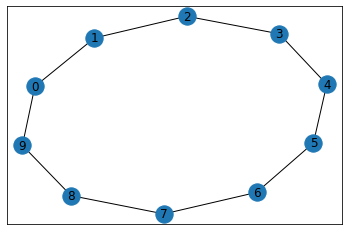

In [29]:
import matplotlib.pyplot as plt
nx.draw_networkx(G)
plt.show()

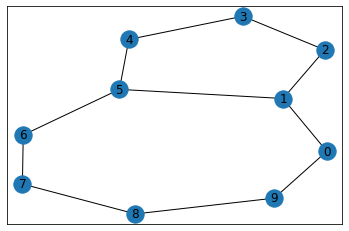

In [30]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()